## Dataset

In this homework, we will use the Car price dataset. Download it:

wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

We'll keep working with the MSRP variable, and we'll transform it to a classification task.



In [204]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [10]:
df = pd.read_csv('/home/timur/work_hub/ml_zoomcamp2023/3. Machine Learning for Classification/data.csv')

In [11]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Features


For the rest of the homework, you'll need to use only these columns:

- Make
- Model
- Year
- Engine HP
- Engine Cylinders
- Transmission Type
- Vehicle Style
- highway MPG
- city mpg

In [12]:
features = ['Make',
            'Model',
            'Year',
            'Engine HP',
            'Engine Cylinders',
            'Transmission Type',
            'Vehicle Style',
            'highway MPG',
            'city mpg',
            'MSRP']

## Data preparation

In [13]:
df = df[features]
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


Standartize names of columns (replace blank space with underscore and hange names to lower case

In [17]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [18]:
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

Fill in the missing values of the selected features with 0.

In [19]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [24]:
df[['engine_hp', 'engine_cylinders']] = df[['engine_hp', 'engine_cylinders']].fillna(0)

In [25]:
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

Rename MSRP variable to price

In [39]:
df = df.rename(columns={'msrp':'price'})

In [40]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


## Question 1

What is the most frequent observation (mode) for the column transmission_type?

- AUTOMATIC
- MANUAL
- AUTOMATED_MANUAL
- DIRECT_DRIVE

In [41]:
df['transmission_type'].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

## Answer: 

- AUTOMATIC

## Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- engine_hp and year
- engine_hp and engine_cylinders
- highway_mpg and engine_cylinders
- highway_mpg and city_mpg

In [46]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


Create 2 lists: numerical and categorical 

In [43]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

In [47]:
df[numerical]

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
0,2011,335.0,6.0,26,19
1,2011,300.0,6.0,28,19
2,2011,300.0,6.0,28,20
3,2011,230.0,6.0,28,18
4,2011,230.0,6.0,28,18
...,...,...,...,...,...
11909,2012,300.0,6.0,23,16
11910,2012,300.0,6.0,23,16
11911,2012,300.0,6.0,23,16
11912,2013,300.0,6.0,23,16


Create correlation matrix

In [52]:
df[numerical].corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


## Answer: 

- highway_mpg and city_mpg

## Make price binary

- Now we need to turn the price variable from numeric into a binary format.
- Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [60]:
df['above_average'] = (df.price > df.price.mean()).astype(int)

In [61]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


## Split the data

- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (above_average) is not in your dataframe.

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [106]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [107]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [108]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [111]:
y_train = df_train['above_average']
y_val = df_val['above_average']
y_test = df_test['above_average']

In [112]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [113]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,33599
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,26245
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,248000
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,24990
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,20475
...,...,...,...,...,...,...,...,...,...,...
7143,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18,37655
7144,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21,25135
7145,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17,28345
7146,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19,2000


## Question 3

- Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).

Which of these variables has the lowest mutual information score?

- make
- model
- transmission_type
- vehicle_style

In [97]:
from sklearn.metrics import mutual_info_score

In [99]:
def mutual_main_info_score(series):
    return mutual_info_score(series, df_full_train.above_average)

In [101]:
df_full_train[categorical].apply(mutual_main_info_score)

make                 0.238724
model                0.460994
transmission_type    0.020884
vehicle_style        0.083390
dtype: float64

## Answer:

- transmission_type    

## Question 4

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.

        To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
        model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

#### One-hot encoding

In [131]:
dv = DictVectorizer(sparse=False)

#### X_train

In [153]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
train_dict[:3]

[{'make': 'Mitsubishi',
  'model': 'Endeavor',
  'transmission_type': 'AUTOMATIC',
  'vehicle_style': '4dr SUV',
  'year': 2011,
  'engine_hp': 225.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 19,
  'city_mpg': 15},
 {'make': 'Kia',
  'model': 'Borrego',
  'transmission_type': 'AUTOMATIC',
  'vehicle_style': '4dr SUV',
  'year': 2009,
  'engine_hp': 276.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 21,
  'city_mpg': 17},
 {'make': 'Lamborghini',
  'model': 'Gallardo',
  'transmission_type': 'MANUAL',
  'vehicle_style': 'Convertible',
  'year': 2012,
  'engine_hp': 570.0,
  'engine_cylinders': 10.0,
  'highway_mpg': 20,
  'city_mpg': 12}]

In [154]:
X_train = dv.fit_transform(train_dict)

In [155]:
X_train

array([[1.500e+01, 6.000e+00, 2.250e+02, ..., 0.000e+00, 0.000e+00,
        2.011e+03],
       [1.700e+01, 6.000e+00, 2.760e+02, ..., 0.000e+00, 0.000e+00,
        2.009e+03],
       [1.200e+01, 1.000e+01, 5.700e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       ...,
       [1.700e+01, 6.000e+00, 2.600e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       [1.900e+01, 4.000e+00, 1.360e+02, ..., 0.000e+00, 0.000e+00,
        1.993e+03],
       [1.700e+01, 6.000e+00, 3.650e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

#### X_val

In [156]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')

In [157]:
X_val = dv.transform(val_dict)

In [158]:
X_val

array([[2.300e+01, 4.000e+00, 2.100e+02, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [1.700e+01, 6.000e+00, 3.540e+02, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [2.200e+01, 4.000e+00, 1.400e+02, ..., 1.000e+00, 0.000e+00,
        2.005e+03],
       ...,
       [1.200e+01, 6.000e+00, 1.900e+02, ..., 0.000e+00, 0.000e+00,
        2.003e+03],
       [1.400e+01, 8.000e+00, 4.300e+02, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [1.800e+01, 6.000e+00, 3.210e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

Train our model

In [181]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [182]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [183]:
model.intercept_

array([-0.08919584])

In [184]:
model.coef_[0].round(3)

array([ 4.900e-02,  1.000e-02,  3.300e-02,  4.400e-02,  1.056e+00,
        6.260e-01,  2.400e-01,  2.202e+00,  1.896e+00,  8.300e-02,
        0.000e+00, -4.030e-01,  1.866e+00, -1.482e+00, -1.245e+00,
       -2.871e+00, -2.030e-01,  1.420e-01, -1.367e+00, -8.470e-01,
        1.780e-01,  2.000e-03, -1.212e+00, -2.067e+00,  2.730e-01,
       -1.454e+00,  4.000e-03,  1.840e+00,  1.181e+00,  1.105e+00,
        2.352e+00,  4.260e-01,  2.000e-03, -1.100e+00,  0.000e+00,
        1.175e+00, -9.470e-01, -8.050e-01, -5.840e-01, -4.800e-02,
       -1.637e+00,  1.467e+00,  3.570e-01,  9.860e-01, -1.020e-01,
        1.120e-01, -1.570e+00, -1.025e+00,  1.591e+00, -5.590e-01,
       -5.590e-01,  8.360e-01, -3.040e-01, -6.700e-02, -1.600e-02,
       -3.000e-03, -2.000e-03, -2.770e-01, -3.890e-01, -1.000e-03,
       -1.000e-03, -1.000e-03, -1.320e-01,  3.500e-02,  4.660e-01,
       -2.560e-01, -1.130e-01, -4.300e-02, -7.000e-02, -4.400e-02,
       -0.000e+00, -4.000e-03, -4.430e-01,  6.100e-02, -4.500e

Accuracy

In [185]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.0087346 , 0.99033279, 0.00157489, ..., 0.00145975, 0.97178288,
       0.96248167])

In [188]:
y_pred = model.predict(X_val)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [190]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.9345362987830466

## Answer:

- 0.95

## Question 5

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.


Which of following feature has the smallest difference?

- year
- engine_hp
- transmission_type
- city_mpg


Note: the difference doesn't have to be positive

#### Feature elimination

In [177]:
features = categorical + numerical
features

['make',
 'model',
 'transmission_type',
 'vehicle_style',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [195]:
for i in features:
    new_features = features.copy()
    new_features.remove(i)
    
    train_dict = df_train[new_features].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    
    val_dict = df_val[new_features].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)
    print(f' Excluding feature: {i}, Model accuracy: {score}, Difference in accuracy: {accuracy - score}')


 Excluding feature: make, Model accuracy: 0.9488040285354595, Difference in accuracy: -0.014267729752412972
 Excluding feature: model, Model accuracy: 0.9164918170373478, Difference in accuracy: 0.018044481745698726
 Excluding feature: transmission_type, Model accuracy: 0.9450272765421738, Difference in accuracy: -0.010490977759127218
 Excluding feature: vehicle_style, Model accuracy: 0.9320184641208561, Difference in accuracy: 0.0025178346621904657
 Excluding feature: year, Model accuracy: 0.9483843894250944, Difference in accuracy: -0.013848090642047839
 Excluding feature: engine_hp, Model accuracy: 0.9349559378934117, Difference in accuracy: -0.00041963911036513313
 Excluding feature: engine_cylinders, Model accuracy: 0.9471254720939991, Difference in accuracy: -0.01258917331095255
 Excluding feature: highway_mpg, Model accuracy: 0.9467058329836341, Difference in accuracy: -0.012169534200587528
 Excluding feature: city_mpg, Model accuracy: 0.9458665547629039, Difference in accuracy:

## Answer:

- engine_hp - difference between the original accuracy and the accuracy without the engine_hp feature is: **-0.00041963911036513313** 

## Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column price. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
- This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
- Round your RMSE scores to 3 decimal digits.


Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

<Axes: xlabel='price', ylabel='Count'>

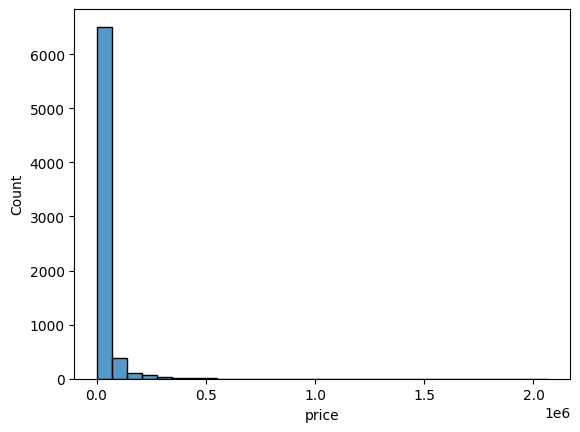

In [209]:
sns.histplot(df_train.price, bins=30)

In [232]:
df_train.price.describe().round(3)

count       7148.000
mean       40606.938
std        59448.109
min         2000.000
25%        21210.000
50%        29995.000
75%        42360.000
max      2065902.000
Name: price, dtype: float64

In [233]:
df_train.price.describe().round(3)[[3, 7]]

min       2000.0
max    2065902.0
Name: price, dtype: float64